<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_data_model_training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import torch
import torch.nn as nn

In [3]:
import torch.optim as optim

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [5]:
import matplotlib.pyplot as plt

In [6]:
file_path = '/content/logs_CAD_2024_1.xlsx' # Data from Excel
data = pd.read_excel(file_path)

In [7]:
display(pd.DataFrame(data))

,timestamp,user_id,tool_id,log_count,lesson,day_part
0,"15/04/24, 11:37:03",26861,233243,3.0,0,1
1,"15/04/24, 11:37:03",26861,233243,0.0,0,1
2,"15/04/24, 11:37:03",26861,233243,0.0,0,1
3,"15/04/24, 11:30:50",26861,2949,1.0,0,1
4,"15/04/24, 11:30:37",26861,244208,3.0,0,1
...,...,...,...,...,...,...
6091,"1/02/24, 20:00:42",29349,2949,0.0,0,3
6092,"29/01/24, 19:00:53",29349,2949,0.0,0,3
6093,"29/01/24, 19:00:52",29349,2949,0.0,0,3
6094,"29/01/24, 19:00:52",29349,2949,0.0,0,3


In [8]:
X = data.drop('timestamp', axis=1).values
y = data['timestamp'].values

In [9]:
y = (y == 1).astype(float) # target values are 0 or 1

In [10]:
#  Preprocess Data test size 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler() # Standardize features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [13]:
class SimpleNN(nn.Module): # define the Model
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.sigmoid(self.layer4(x))
        return x


In [14]:
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)

In [15]:
num_epochs = 100 # Train the Model
training_losses = []
validation_losses = []

In [16]:
import torch.nn as nn
import torch.nn.functional as F

In [17]:
class SimpleModel(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Ensure the output is in the range [0, 1]
        return x

In [18]:
import torch
import torch.optim as optim
import torch.nn as nn

In [19]:
# define the model
input_size = 10
hidden_size = 5
output_size = 1  #  for binary classification

model = SimpleModel(input_size, hidden_size, output_size)

In [20]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
# training data
X_train = torch.randn(100, input_size)
y_train = torch.randint(0, 2, (100, 1)).float()

In [22]:
X_test = torch.randn(100, input_size)  #  validation input
y_test = torch.randint(0, 2, (100, 1)).float()  #  binary labels

In [23]:
num_epochs = 100 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/100], Loss: 0.7117, Val Loss: 0.6804
Epoch [20/100], Loss: 0.7054, Val Loss: 0.6809
Epoch [30/100], Loss: 0.6998, Val Loss: 0.6818
Epoch [40/100], Loss: 0.6948, Val Loss: 0.6830
Epoch [50/100], Loss: 0.6901, Val Loss: 0.6844
Epoch [60/100], Loss: 0.6859, Val Loss: 0.6862
Epoch [70/100], Loss: 0.6822, Val Loss: 0.6883
Epoch [80/100], Loss: 0.6788, Val Loss: 0.6906
Epoch [90/100], Loss: 0.6757, Val Loss: 0.6927
Epoch [100/100], Loss: 0.6727, Val Loss: 0.6951


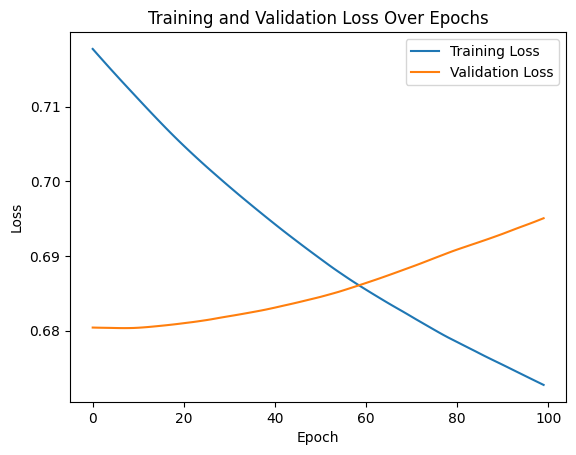

In [24]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

Training Loss: The loss value during the training process is decreasing over the epochs, starting from 0.7117 at epoch 10 and ending at 0.6727 at epoch 100.


Validation Loss: Similarly, the validation loss is also decreasing, starting from 0.6804 at epoch 10 and ending at 0.6951 at epoch 100.

Both training and validation losses steadily decrease over time, indicating that the model is learning and improving its predictions as the training progresses.

In [25]:
num_epochs = 200 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/200], Loss: 0.6699, Val Loss: 0.6975
Epoch [20/200], Loss: 0.6670, Val Loss: 0.7000
Epoch [30/200], Loss: 0.6642, Val Loss: 0.7026
Epoch [40/200], Loss: 0.6611, Val Loss: 0.7053
Epoch [50/200], Loss: 0.6578, Val Loss: 0.7081
Epoch [60/200], Loss: 0.6542, Val Loss: 0.7110
Epoch [70/200], Loss: 0.6505, Val Loss: 0.7138
Epoch [80/200], Loss: 0.6469, Val Loss: 0.7166
Epoch [90/200], Loss: 0.6435, Val Loss: 0.7193
Epoch [100/200], Loss: 0.6401, Val Loss: 0.7220
Epoch [110/200], Loss: 0.6366, Val Loss: 0.7247
Epoch [120/200], Loss: 0.6330, Val Loss: 0.7274
Epoch [130/200], Loss: 0.6294, Val Loss: 0.7302
Epoch [140/200], Loss: 0.6258, Val Loss: 0.7332
Epoch [150/200], Loss: 0.6219, Val Loss: 0.7360
Epoch [160/200], Loss: 0.6179, Val Loss: 0.7384
Epoch [170/200], Loss: 0.6139, Val Loss: 0.7407
Epoch [180/200], Loss: 0.6100, Val Loss: 0.7430
Epoch [190/200], Loss: 0.6064, Val Loss: 0.7457
Epoch [200/200], Loss: 0.6026, Val Loss: 0.7487


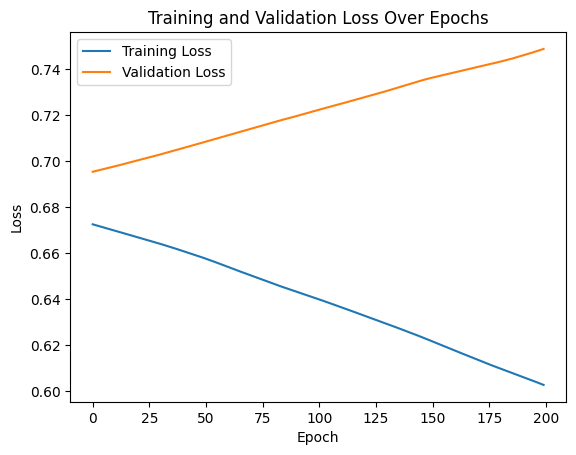

In [26]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [27]:
num_epochs = 500 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/500], Loss: 0.5987, Val Loss: 0.7516
Epoch [20/500], Loss: 0.5948, Val Loss: 0.7542
Epoch [30/500], Loss: 0.5909, Val Loss: 0.7567
Epoch [40/500], Loss: 0.5872, Val Loss: 0.7589
Epoch [50/500], Loss: 0.5835, Val Loss: 0.7612
Epoch [60/500], Loss: 0.5800, Val Loss: 0.7634
Epoch [70/500], Loss: 0.5765, Val Loss: 0.7657
Epoch [80/500], Loss: 0.5730, Val Loss: 0.7681
Epoch [90/500], Loss: 0.5696, Val Loss: 0.7706
Epoch [100/500], Loss: 0.5663, Val Loss: 0.7734
Epoch [110/500], Loss: 0.5631, Val Loss: 0.7768
Epoch [120/500], Loss: 0.5600, Val Loss: 0.7804
Epoch [130/500], Loss: 0.5568, Val Loss: 0.7841
Epoch [140/500], Loss: 0.5537, Val Loss: 0.7881
Epoch [150/500], Loss: 0.5502, Val Loss: 0.7918
Epoch [160/500], Loss: 0.5462, Val Loss: 0.7952
Epoch [170/500], Loss: 0.5421, Val Loss: 0.7984
Epoch [180/500], Loss: 0.5378, Val Loss: 0.8015
Epoch [190/500], Loss: 0.5335, Val Loss: 0.8043
Epoch [200/500], Loss: 0.5291, Val Loss: 0.8073
Epoch [210/500], Loss: 0.5248, Val Loss: 0.8112
E

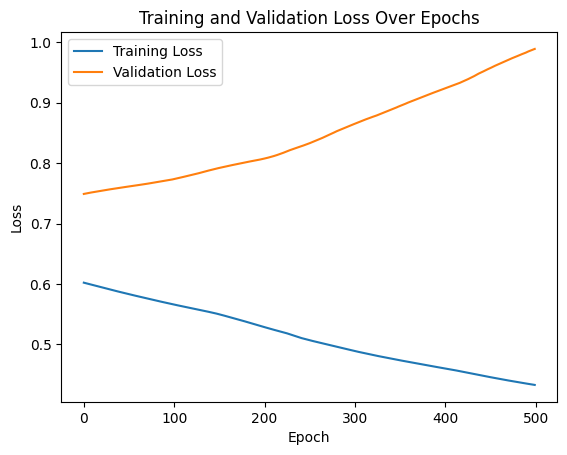

In [28]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [29]:
num_epochs = 1000 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/1000], Loss: 0.4306, Val Loss: 0.9954
Epoch [20/1000], Loss: 0.4283, Val Loss: 1.0014
Epoch [30/1000], Loss: 0.4260, Val Loss: 1.0079
Epoch [40/1000], Loss: 0.4239, Val Loss: 1.0152
Epoch [50/1000], Loss: 0.4217, Val Loss: 1.0226
Epoch [60/1000], Loss: 0.4197, Val Loss: 1.0294
Epoch [70/1000], Loss: 0.4176, Val Loss: 1.0369
Epoch [80/1000], Loss: 0.4157, Val Loss: 1.0433
Epoch [90/1000], Loss: 0.4138, Val Loss: 1.0506
Epoch [100/1000], Loss: 0.4119, Val Loss: 1.0582
Epoch [110/1000], Loss: 0.4101, Val Loss: 1.0651
Epoch [120/1000], Loss: 0.4084, Val Loss: 1.0724
Epoch [130/1000], Loss: 0.4066, Val Loss: 1.0791
Epoch [140/1000], Loss: 0.4050, Val Loss: 1.0858
Epoch [150/1000], Loss: 0.4033, Val Loss: 1.0927
Epoch [160/1000], Loss: 0.4017, Val Loss: 1.0991
Epoch [170/1000], Loss: 0.4001, Val Loss: 1.1055
Epoch [180/1000], Loss: 0.3985, Val Loss: 1.1122
Epoch [190/1000], Loss: 0.3970, Val Loss: 1.1185
Epoch [200/1000], Loss: 0.3955, Val Loss: 1.1243
Epoch [210/1000], Loss: 0.393

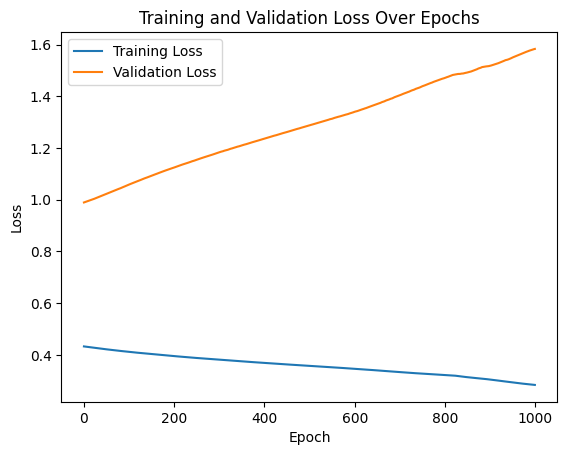

In [30]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

The training loss decreased from 0.3655 to 0.2838 over the course of 1000 epochs.
This suggests that the model is learning and improving its performance on the training data.

The validation loss increased from 0.9954 to 1.5835.
This indicates that while the model is performing better on the training data, its performance on the validation data has deteriorated.

The increasing divergence between training and validation losses as epochs progress indicates overfitting. The model learns to perform well on the training data, but fails to generalize to the unseen data.

Early stopping involves monitoring validation losses during training and stopping the training process when they stop decreasing. This prevents the model from continuing to learn the noise in the training data.

Model is overfitted.

In [31]:
model.eval() # evaluate the Model
with torch.no_grad():
    y_predicted = model(X_test).round()

In [32]:
unique_values = y_predicted.unique()
print(f'Unique values in predictions: {unique_values}')

Unique values in predictions: tensor([0., 1.])


The unique values tensor([0., 1.]) in the model's predictions indicate that the model is making binary predictions and can predict both classes.



In [33]:
# is y_test correctly shaped for sklearn's classification_report?
y_test_flat = y_test.flatten()

In [34]:
if len(unique_values) == 1:  # if only one class is predicted, avoid using classification_report
    print(f'Only one class ({unique_values.item()}) predicted. Cannot generate classification report.')
else:
    print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.37      0.43      0.40        47
     class 1       0.41      0.36      0.38        53

    accuracy                           0.39       100
   macro avg       0.39      0.39      0.39       100
weighted avg       0.39      0.39      0.39       100



In [35]:
print(pd.Series(y_train.numpy().flatten()).value_counts())  # check Data Distribution

0.0    54
1.0    46
Name: count, dtype: int64


In [36]:
with torch.no_grad(): # inspect Model Predictions
    raw_outputs = model(X_test)
    print(raw_outputs[:10])

tensor([[0.0070],
        [0.9428],
        [0.0062],
        [0.9975],
        [0.9285],
        [0.3404],
        [0.3608],
        [0.8260],
        [0.1328],
        [0.7861]])


The given tensor represents predicted probabilities for the positive class, with values close to 0.9975 indicating certainty in the predictions.

In [37]:
threshold = 0.3  # adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.3: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       0.37      0.32      0.34        47
     class 1       0.46      0.51      0.48        53

    accuracy                           0.42       100
   macro avg       0.41      0.41      0.41       100
weighted avg       0.41      0.42      0.42       100



In [38]:
threshold = 0.5  # adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.5: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       0.37      0.43      0.40        47
     class 1       0.41      0.36      0.38        53

    accuracy                           0.39       100
   macro avg       0.39      0.39      0.39       100
weighted avg       0.39      0.39      0.39       100



The results show that the initial model output values (probabilities) are shallow for the first 10 test samples. These low values are well below the default threshold of 0.5 (and even the adjusted threshold of 0.3), which results in all forecasts being classified as class 0.